In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt         
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import models
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"

In [2]:
tf.config.experimental.set_visible_devices([], 'GPU')
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
config = tf.config.experimental.set_memory_growth(physical_devices[0], True)
print(physical_devices)
print(config)

AssertionError: Not enough GPU hardware devices available

In [2]:
def custom_image_preprocess( image ):

    random_lotation_layer = tf.keras.layers.RandomRotation(
                            factor=(-0.2, 0.3),
                            fill_mode='nearest',
                            interpolation='nearest',
                            seed=None,
                            fill_value=0.0,
                        )
    
    return  random_lotation_layer(image)


In [3]:
BATCH_SIZE = 16
IMG_HEIGHT = 72
IMG_WIDTH = 72
IMG_CHANNELS= 3

train_dir = '/Users/krao/Documents/teamcode/Alzheimer_sDataset3/train'
test_dir = '/Users/krao/Documents/teamcode/Alzheimer_sDataset3/test'

seed_1 = tf.random.set_seed(1234)
seed_2 = tf.random.set_seed(1235)

In [4]:
train_image_generator = ImageDataGenerator(rescale=1. / 255, vertical_flip=True, horizontal_flip=True, preprocessing_function=custom_image_preprocess,) 
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    class_mode='categorical',
    color_mode='rgb',
    seed=seed_1,)
    
test_image_generator = ImageDataGenerator(rescale=1. / 255, vertical_flip=True, horizontal_flip=True, preprocessing_function=custom_image_preprocess,)
test_data_gen = test_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
    directory=test_dir,
    shuffle=False,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    class_mode='categorical',
    color_mode='rgb',
    seed=seed_2,)

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [5]:
class_names =['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
print(class_names)

num_classes = len(class_names)

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


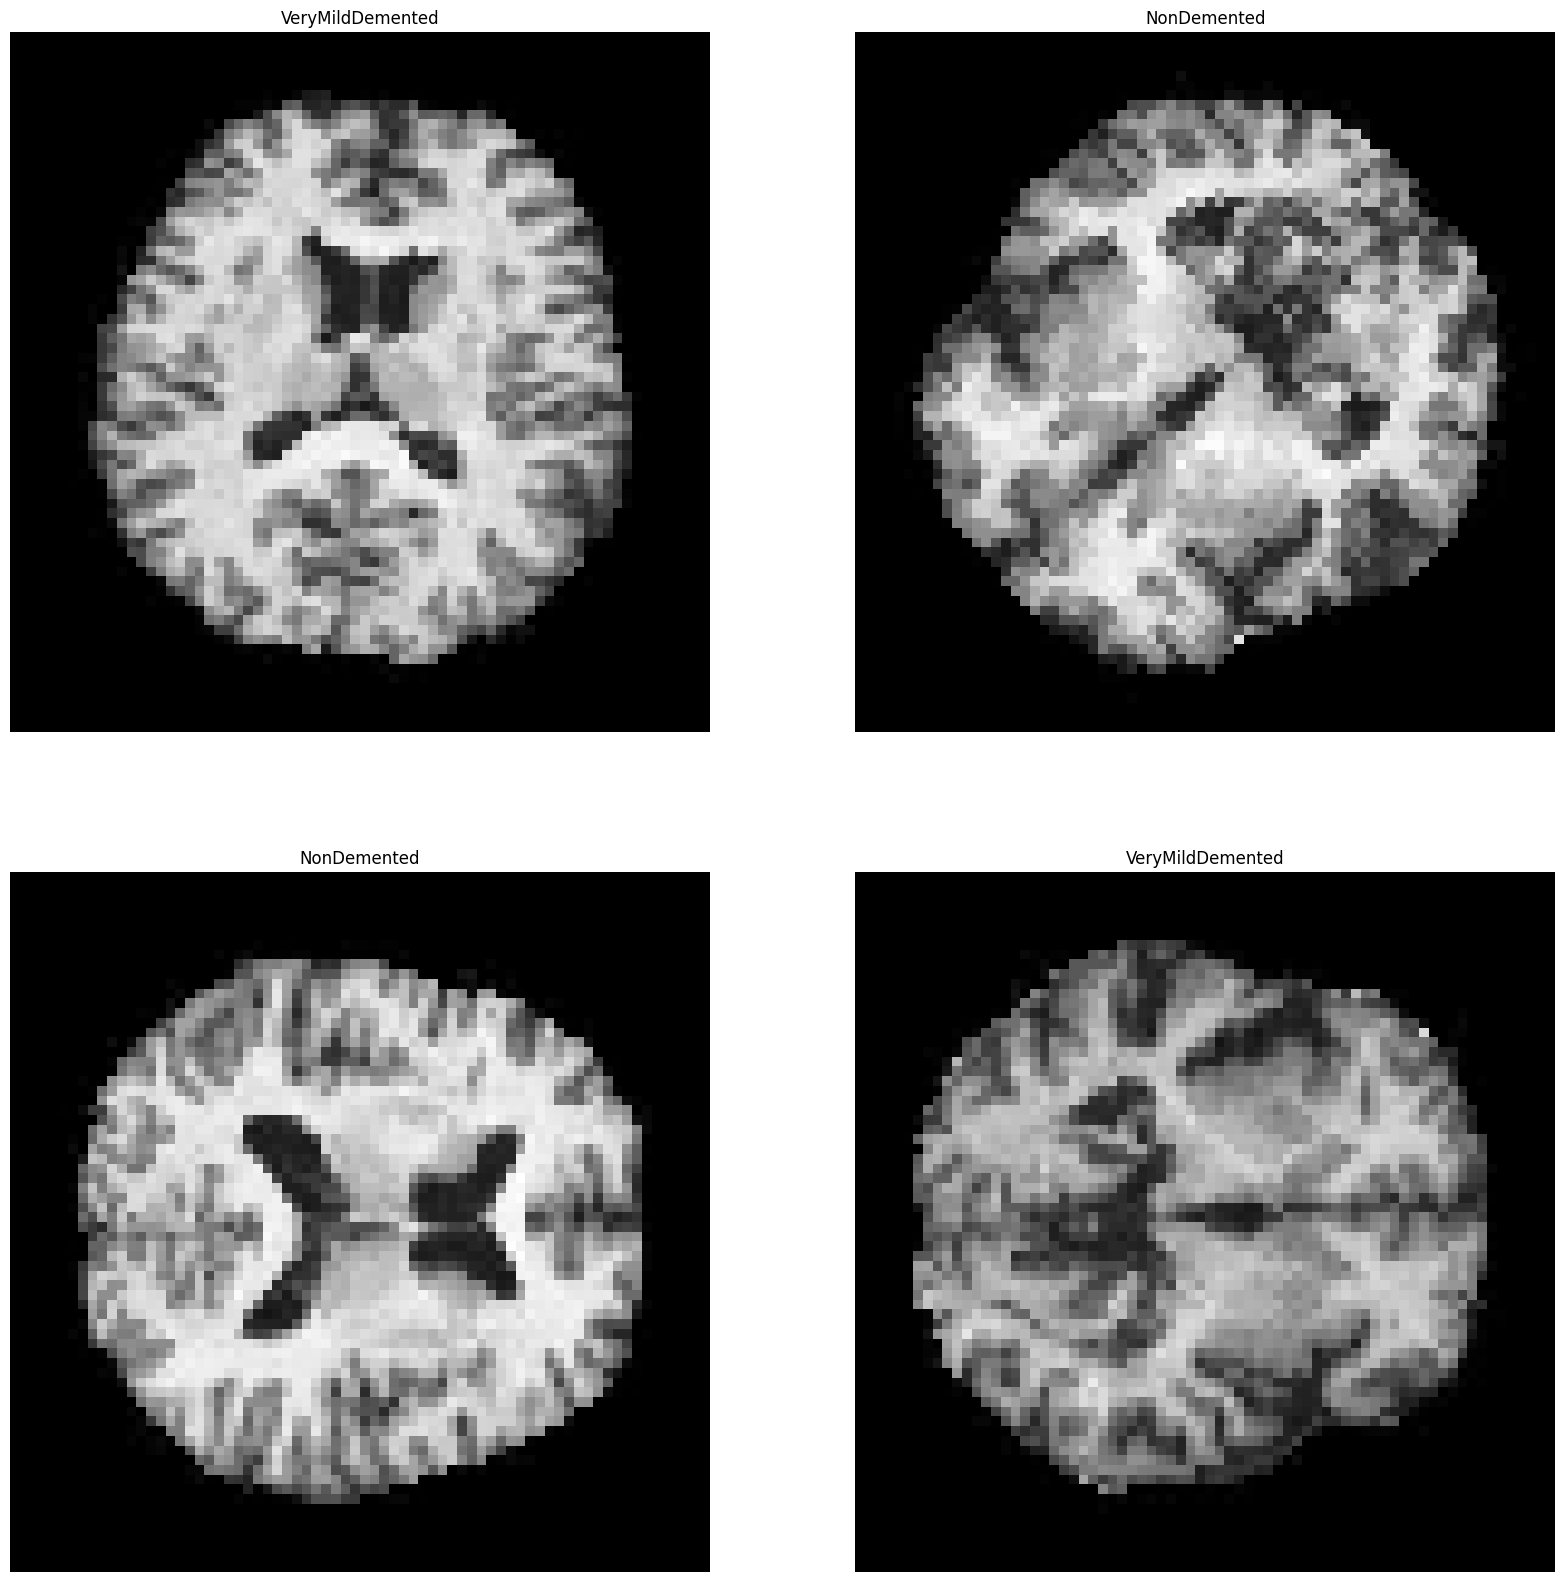

In [6]:
plt.figure(figsize=(20, 20))
for images, labels in train_data_gen:
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i])
    label_index = np.argmax(labels[i])
    plt.title(class_names[label_index])
    plt.axis("off")
  break


In [7]:
base_model = tf.keras.applications.Xception( weights='imagenet', input_shape=(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS), include_top=False)  
base_model.trainable = False
inputs = tf.keras.Input(shape=(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS))

x = tf.keras.applications.xception.preprocess_input(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)  
outputs = tf.keras.layers.Dense(num_classes)(x)
model = tf.keras.Model(inputs, outputs)

In [14]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=tf.keras.metrics.BinaryAccuracy())

In [20]:
model.fit(train_data_gen, epochs=10, validation_data=test_data_gen)

Epoch 1/10
  8/321 [..............................] - ETA: 4:56 - loss: 0.5044 - binary_accuracy: 0.7500

KeyboardInterrupt: 

In [13]:
epochs=1
history = model.fit(
  train_data_gen,
  validation_data=test_data_gen,
  epochs=epochs
)

 26/321 [=>............................] - ETA: 6:58 - loss: 0.6793 - binary_accuracy: 0.7500

KeyboardInterrupt: 

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: name 'history' is not defined

1/1 [==============================] - 0s 141ms/step
This image most likely belongs to NonDemented with a 27.91 percent confidence.


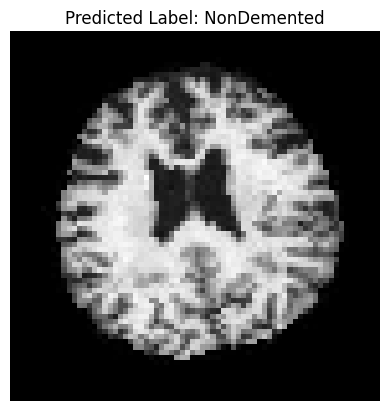

Prediction is incorrect :(


In [36]:
random_image_index = np.random.randint(0, len(random_image_batch))
random_image = random_image_batch[random_image_index]
random_image_label = random_image_label_batch[random_image_index]

# Preprocess the image
random_image_array = tf.keras.utils.img_to_array(random_image)
random_image_array = tf.expand_dims(random_image_array, 0) # Create a batch

# Make predictions with your model
predictions = model.predict(random_image_array)
score = tf.nn.softmax(predictions[0])

# Print the class and confidence of the prediction
predicted_label = class_names[np.argmax(score)]
confidence = 100 * np.max(score)

print(f"This image most likely belongs to {predicted_label} with a {confidence:.2f} percent confidence.")

# Display the image and its predicted label
plt.imshow(random_image)
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()

if str(predicted_label) == str(random_image_label):
  print("Prediction is correct!")
else:
  print("Prediction is incorrect :(")